<a href="https://colab.research.google.com/github/jaekwonkim-hmc/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

## data.csv 파일 읽기
df = pd.read_csv('data.csv', encoding='utf-8', sep=',', header=0,
                 index_col=None, nrows=None)
print(df)

           날짜    체중  골격근량  체지방량
0  2025.02.06  64.7  30.0  11.1
1  2025.02.04  64.0  29.3  11.6


## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력
with open('data.json', mode='r',encoding='utf-8') as f:
    df1=json.load(f)
print(df1)

## data.json 파일 DataFrame 읽기
df = pd.read_json('data.json', orient='records', encoding='utf-8', lines=False)
print(df)

{'매출데이터': [{'월': '2025-01', '매출액': 1000000, '비용': 700000, '이익': 300000}, {'월': '2025-02', '매출액': 1200000, '비용': 800000, '이익': 400000}, {'월': '2025-03', '매출액': 1500000, '비용': 900000, '이익': 600000}]}
                                               매출데이터
0  {'월': '2025-01', '매출액': 1000000, '비용': 700000,...
1  {'월': '2025-02', '매출액': 1200000, '비용': 800000,...
2  {'월': '2025-03', '매출액': 1500000, '비용': 900000,...


## 4-3 텍스트 파일 읽기 및 데이터 추출

In [1]:
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성
pattern = re.compile(r'(\d{6})-(\d{7})')

## 주민등록번호 마스킹
masked_content = pattern.sub(r'\1-*******', content)

## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기
with open('callcenter20250301_masked.log', mode='w') as f:
    f.write(masked_content)

print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.


## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
#    "latitude": "37.58638333",
#    "longitude": "127.0203333",
    "latitude": "37.287083",
    "longitude": "126.991250",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송
    response = requests.get(url, params=params)
    response.raise_for_status()
    ## JSON 데이터 읽기
    data = response.json()

    print("API 응답:", data)
#    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))
    print("우리집의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))


except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

API 응답: {'latitude': 37.3, 'longitude': 127.0, 'generationtime_ms': 0.03266334533691406, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 40.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C'}, 'current': {'time': '2025-09-13T02:00', 'interval': 900, 'temperature_2m': 23.9}}
우리집의 현재 온도는 : 23.9°C 입니다.


## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [2]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  114M  100  114M    0     0  91.2M      0  0:00:01  0:00:01 --:--:-- 91.3M
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
The following additional packages will be installed:
  libvulkan1 mesa-vulkan-drivers
The following NEW packages will be installed:
  google-chrome-stable libvulkan1 mesa-vulkan-drivers
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.9 MB/131 MB of archives.
After this operation, 448 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan1 amd64 1.3.204.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 mesa-vulkan-drivers amd64 23.2.1-1ubuntu3.1~22.04.3 [10.7

<html lang="ko" class="fzoom" data-theme="greenLight"><head><script async="" src="https://ntm.pstatic.net/ex/nlog.js"></script><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" cont
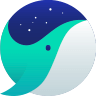
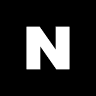

In [33]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속
#url = 'https://professor.knou.ac.kr/jaehwachung/index.do'
#url = 'https://www.seoul.go.kr/member/findId/findId.do'
url = 'https://www.naver.com/'
driver.get(url)

## 사이트 접속 대기
time.sleep(2)

## 페이지 제목 출력
page_source = driver.page_source
tree = html.fromstring(page_source)
print(page_source)  # //요소명/@속성명
title_text = tree.xpath('//title/text()')

print(title_text)

## 드라이버 종료
driver.quit()


# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty'
api_key = ''

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

## 데이터 수집
response = requests.get(url, params = params)

## 호출 성공/실패 출력
print(response.json())


{'response': {'body': {'totalCount': 40, 'items': [{'so2Grade': '1', 'coFlag': None, 'khaiValue': '60', 'so2Value': '0.002', 'coValue': '0.2', 'pm25Flag': None, 'pm10Flag': None, 'o3Grade': '2', 'pm10Value': '3', 'khaiGrade': '2', 'pm25Value': '1', 'sidoName': '서울', 'no2Flag': None, 'no2Grade': '1', 'o3Flag': None, 'pm25Grade': '1', 'so2Flag': None, 'dataTime': '2025-09-13 11:00', 'coGrade': '1', 'no2Value': '0.010', 'stationName': '중구', 'pm10Grade': '1', 'o3Value': '0.042'}, {'so2Grade': '1', 'coFlag': None, 'khaiValue': '56', 'so2Value': '0.003', 'coValue': '0.3', 'pm25Flag': None, 'pm10Flag': None, 'o3Grade': '2', 'pm10Value': '5', 'khaiGrade': '2', 'pm25Value': '4', 'sidoName': '서울', 'no2Flag': None, 'no2Grade': '1', 'o3Flag': None, 'pm25Grade': '1', 'so2Flag': None, 'dataTime': '2025-09-13 11:00', 'coGrade': '1', 'no2Value': '0.008', 'stationName': '한강대로', 'pm10Grade': '1', 'o3Value': '0.037'}, {'so2Grade': '1', 'coFlag': None, 'khaiValue': '61', 'so2Value': '0.002', 'coValue': '0